In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open('voicemos_confint.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    data = [row for row in csvreader]

In [3]:
data[0]

['sysa1387', '4.45', '0.36', '0.26', '0.20', '0.09', '0.10']

In [4]:
mos = np.array([float(d[1]) for d in data])

In [5]:
d_Hoeffding = np.array([float(d[2]) for d in data])

In [6]:
d_Chernoff = np.array([float(d[3]) for d in data])

In [7]:
d_ExactAsymptotics = np.array([float(d[4]) for d in data])

In [8]:
d_CentralLimitTheorem = np.array([float(d[5]) for d in data])

In [9]:
d_CentralLimitTheoremT = np.array([float(d[6]) for d in data])

In [10]:
labels = np.array([d[0] for d in data])

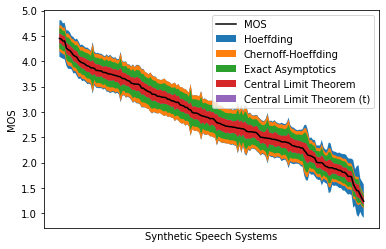

In [11]:
plt.fill_between(range(len(mos)), mos - d_Hoeffding, mos + d_Hoeffding, label='Hoeffding', zorder=0.1)
plt.fill_between(range(len(mos)), mos - d_Chernoff, mos + d_Chernoff, label='Chernoff-Hoeffding', zorder=0.2)
plt.fill_between(range(len(mos)), mos - d_ExactAsymptotics, mos + d_ExactAsymptotics, label='Exact Asymptotics', zorder=0.3)
plt.fill_between(range(len(mos)), mos - d_CentralLimitTheorem, mos + d_CentralLimitTheorem, label='Central Limit Theorem', zorder=0.5)
plt.fill_between(range(len(mos)), mos - d_CentralLimitTheoremT, mos + d_CentralLimitTheoremT, label='Central Limit Theorem (t)', zorder=0.4)
plt.plot(range(len(mos)), mos, color='black', label='MOS', zorder=0.6, )
plt.legend()
# plt.xticks(range(len(mos)), labels, rotation='vertical')
plt.xticks([])
plt.xlabel('Synthetic Speech Systems')
plt.ylabel('MOS')
plt.savefig('voicemos_eng.pdf', bbox_inches="tight")

In [12]:
with open('n_insignificant.csv', newline='') as csvfile:
    csvreader = csv.reader(csvfile, delimiter=',')
    n_insignificant = [row for row in csvreader]

In [13]:
mean = [float(r[0]) * 4 + 1 for r in n_insignificant]
n_Hoeffding = [int(r[1]) for r in n_insignificant]
n_Chernoff = [int(r[2]) for r in n_insignificant]
n_ExactAsymptotics = [int(r[3]) for r in n_insignificant]
n_centralLimitTheorems = [int(r[4]) for r in n_insignificant]
n_centralLimitTheoremT = [int(r[5]) for r in n_insignificant]

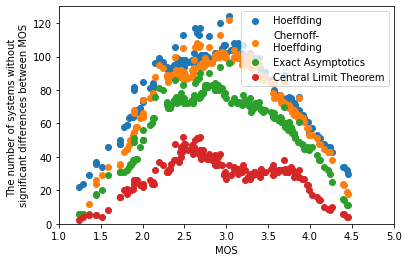

In [14]:
plt.scatter(mean, n_Hoeffding, label='Hoeffding')
plt.scatter(mean, n_Chernoff, label='Chernoff-\nHoeffding')
plt.scatter(mean, n_ExactAsymptotics, label='Exact Asymptotics')
plt.scatter(mean, n_centralLimitTheorems, label='Central Limit Theorem')
# plt.scatter(mean, n_centralLimitTheoremT, label='Central Limit Theorem (t)')
# plt.xlim(1, 5)
plt.ylim(0, 130)
plt.xticks([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5])
plt.legend()
plt.ylabel('The number of systems without \nsignificant differences between MOS')
plt.xlabel('MOS')
plt.savefig('n_insignificant.pdf', bbox_inches="tight")